   # Stroke Prediction 

Stroke : A stroke is a medical condition in which poor blood flow to the brain causes cell death.

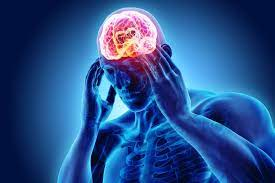

> This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. 

TABLE OF CONTENTS

1-)Importing Libraries 

2-)Data Review

3-)Exploratory Data Analysis

4-)One Hot Encoding

5-)Split Data

7-)Standardize

8-)Build Model And Accurcy Value

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1-)Importing Libraries 


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score
filterwarnings("ignore")


data =pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
data = data.drop("id",axis=1)

# 2-) Data Review

*  In this section, we will examine our data.

In [ ]:
data.shape # Our data has 5110 rows and 11 columns.

In [ ]:
data.columns #Below are our features

In [ ]:
data.head() # The first 5 lines of our data

In [ ]:
data.describe().T 

In [ ]:
data.isnull().sum() #Let's check if we have null data.


* There are 201 null data in our bmi variable. Let's fill them with mean.

# Assign Value To Blank Data


In [ ]:
data.bmi.mean() #bmi variable is mean


In [ ]:
data["bmi"]=data["bmi"].fillna(data["bmi"].mean()) 

#We called the fillna method to fill in the null data. We assigned the mean value of bmi into it.


In [ ]:
data.isnull().sum()
#successful

# 3-)Exploratory Data Analysis


* Detailed review of our data

In [ ]:
corr_matrix=data.corr()
sns.clustermap(corr_matrix,annot=True,fmt =".2f")
plt.show()

#Correlation of properties.

In [ ]:
sns.pairplot(data)

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

sns.violinplot(x=data["stroke"], y=data["age"], ax=axs[0, 0])
sns.violinplot(x=data["stroke"], y=data["avg_glucose_level"], ax=axs[0, 1])
sns.violinplot(x=data["stroke"], y=data["bmi"], ax=axs[0, 2])
sns.violinplot(x=data["stroke"], y=data["heart_disease"], ax=axs[1, 0])

sns.violinplot(x=data["stroke"], y=data["hypertension"], ax=axs[1, 1])
sns.violinplot(x=data["stroke"], y=data["ever_married"], ax=axs[1, 2])




In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
sns.histplot(data=data["bmi"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data["avg_glucose_level"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data["age"], kde=True, color="gold", ax=axs[0, 2])
sns.countplot(x = data["stroke"], ax=axs[1, 0])

sns.countplot(x = data["hypertension"], ax=axs[1, 1])
sns.countplot(x = data["heart_disease"], ax=axs[1, 2])
sns.countplot(x = data["ever_married"], ax=axs[2, 0])
sns.countplot(x = data["gender"], ax=axs[2, 1])
sns.countplot(x = data["Residence_type"], ax=axs[2, 2])

plt.show()

**Pie Charts**

In [ ]:
def pie_plot(datam):
    num_1=0
    num_0 =0
    for i in datam:
        if i==0:
            num_0+=1
        else :
            num_1+=1
            
    return num_0,num_1
 

**Stroke Pie Charts**

In [ ]:
num_0,num_1=pie_plot(data.stroke)
names='1','0',
values=[num_1,num_0]
 
plt.pie(values, labels=names, labeldistance=1.15,radius=1.8);
plt.show();

print(num_1)
print(num_0)

**Hypertension Pie Charts**

In [ ]:
num_0,num_1=pie_plot(data.hypertension)
names='1','0',
values=[num_1,num_0]
 
plt.pie(values, labels=names, labeldistance=1.15,radius=1.8);
plt.show();

print(num_1)
print(num_0)

**Heart_disease Pie Charts**

In [ ]:
num_0,num_1=pie_plot(data.heart_disease)
names='1','0',
values=[num_1,num_0]
 
plt.pie(values, labels=names, labeldistance=1.15,radius=1.8);
plt.show();

print(num_1)
print(num_0)

In [ ]:
plt.figure(figsize=(10,8))

sns.distplot(data[data.stroke != 0]["age"], color="blue")
sns.distplot(data[data.stroke == 0]["age"], color="green")


plt.title("Stroke vs No Strock   ", fontsize=15)
plt.xlim([10,100])
plt.show()

# 4-)One Hot Encoding

* We applied one hot encoding to the categorical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder 
lbe=LabelEncoder()
data["hypertension"]=lbe.fit_transform(data["hypertension"])
data["heart_disease"]=lbe.fit_transform(data["heart_disease"])
data["ever_married"]=lbe.fit_transform(data["ever_married"])
data["work_type"]=lbe.fit_transform(data["work_type"])
data["Residence_type"]=lbe.fit_transform(data["Residence_type"])
data["smoking_status"]=lbe.fit_transform(data["smoking_status"])




data=pd.get_dummies(data)
print(data)

# 5-)Split Data

It separates our data.

In [ ]:
y = data["stroke"]
x=data.drop(["stroke"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)



print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

# 6-)Standardize


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 7-)Build Model And Accurcy Value


In [ ]:

from sklearn.svm import SVC

model = SVC().fit(x_train, y_train)

y_pred = model.predict(x_test)
ac = accuracy_score(y_test,y_pred)
con = confusion_matrix(y_test, y_pred)
accuracies = []
accuracies.append(ac)
print("SVC model accuary",ac)
print(con)




In [ ]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier().fit(x_train,y_train)
y_pred =model.predict(x_test)
ac = accuracy_score(y_test,y_pred)
con = confusion_matrix(y_test, y_pred)
accuracies = []
accuracies.append(ac)
print("RandomForestClassifier model accuary",ac)
print(con)

In [ ]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print("The Accuracy Score of RandomForestClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))